# The questions asked by the client

# 1. Provide a visual representation of our annual sales performance over time?

In [2]:
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Sql_functions import read_query

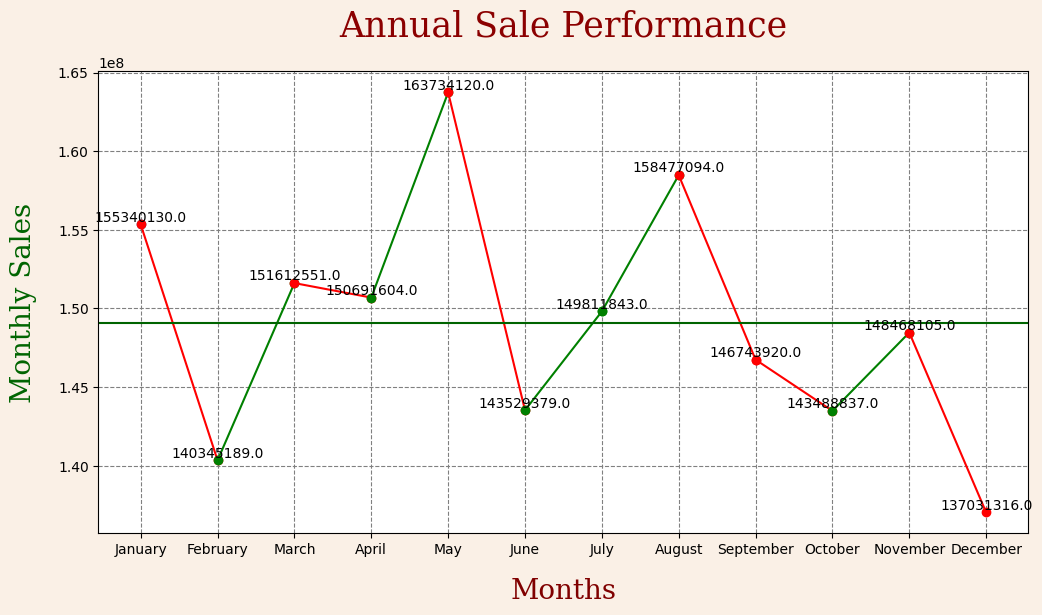

In [4]:
#SQL Query
query='''select Months , M_sales
        from (select month(SaleDate),monthname(SaleDate) as Months,sum(TotalPrice) as M_sales
from salesdata
group by month(SaleDate),Months
order by month(SaleDate)) t;'''

#Executing Query
df = read_query(query=query)

#Assign Variable
Months = df['Months'].values
Monthly_sales=df['M_sales'].astype(float).values
monthly_avg=df['M_sales'].mean()


previous=Monthly_sales[0]
m=1

#Ploting Graph
plt.figure(figsize=(12,6),facecolor='linen')
plt.plot(Months[0],previous,marker='o')

for i in Monthly_sales[1:]:
    if i>previous:
        plt.plot([Months[m-1],Months[m]],[previous,i],color='green',marker='o')
    else:
        plt.plot([Months[m-1],Months[m]],[previous,i],color='red',marker='o')
    previous=i
    m+=1

plt.title('Annual Sale Performance',fontdict={'family':'serif','size':25,'color':'darkred'},pad=25)
plt.xlabel("Months",fontdict={'family':'serif','size':20,'color':'maroon'},labelpad=15)
plt.ylabel("Monthly Sales",fontdict={'family':'serif','size':20,'color':'darkgreen'},labelpad=15)
plt.axhline(y=monthly_avg,color='darkgreen')


for j in range(len(Months)):
    plt.annotate(text=Monthly_sales[j],xy=(j,Monthly_sales[j]),
                horizontalalignment='center',
                verticalalignment='bottom')

plt.show()

# 2. Explore the month-over-month growth rate in sales.

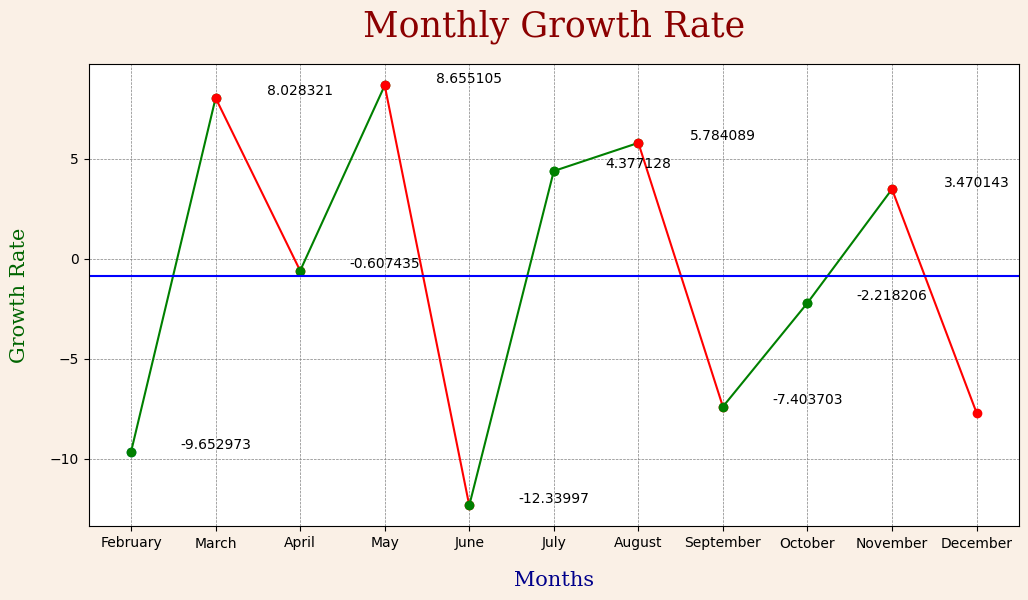

In [5]:
#SQL Query
query = '''select months,T_sales,
lag(T_sales) over(),
100*(T_sales-lag(T_sales) over())/lag(T_sales) over() as Growth_Rate
from (select month(SaleDate),monthname(SaleDate) as months,sum(TotalPrice) as T_sales
from salesdata
group by month(SaleDate),months
order by month(SaleDate)) t;'''

#Query Executing
G_rate=read_query(query=query)

#creating Variable
Month=G_rate['months'].values
G_rate['Growth_Rate']=G_rate['Growth_Rate'].astype(float)
Growth=G_rate['Growth_Rate'].values
Avg_growth=G_rate['Growth_Rate'].mean()

#Ploting Graph
plt.figure(figsize=(12,6),facecolor='linen')
#plt.plot(Month,Growth,color='darkgreen',marker='o')

previous=Growth[1]
m=2


plt.plot(Month[1],previous,marker='o')

for j in Growth[2:]:
    if j>previous:
        plt.plot([Month[m-1],Month[m]],[previous,j],color='green',marker='o')
    else:
        plt.plot([Month[m-1],Month[m]],[previous,j],color='red',marker='o')
    previous=j
    m+=1
    
plt.axhline(Avg_growth,color='blue')
plt.title("Monthly Growth Rate",fontdict={'family':'serif','size':25,'color':'darkred'},pad=20)
plt.xlabel("Months",fontdict={'family':'serif','size':15,'color':'darkblue'},labelpad=15)
plt.ylabel("Growth Rate",fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)

#Annotating Graph
for i in range(len(Month)):
    plt.annotate(text=Growth[i],xy=(i,Growth[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')
    
    

plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()

#  3 .What are the total sales made by each employee?

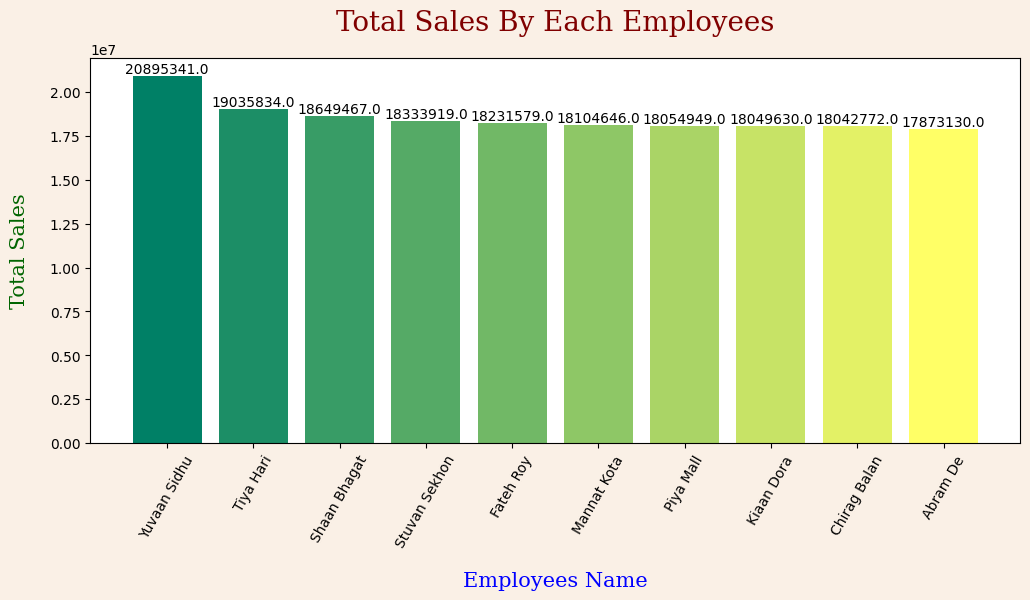

In [7]:
#Sql Query
query='''Select s.EmployeeID , concat(e.FirstName," ",e.LastName) as Emp_Name,sum(s.TotalPrice) as T_sales
from employees e
join salesdata s
on e.EmployeeID=s.EmployeeID
group by s.EmployeeID,Emp_Name
order by T_sales desc
limit 10;'''

#Execute Query
Emp_sales=read_query(query=query)

#Assign Variables
Employees=Emp_sales['Emp_Name'].values
T_sales=Emp_sales['T_sales'].astype(float).values

#Cmap Values
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,5),facecolor='linen')
plt.bar(height=T_sales,x=Employees,color=cmap)
plt.title('Total Sales By Each Employees',fontdict={'family':'serif','size':20,'color':'maroon'},pad=20)
plt.xlabel('Employees Name',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.ylabel('Total Sales',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=60)

#Annotating Graph
for i in range(len(Employees)):
    plt.annotate(text=T_sales[i],xy=(i,T_sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

#plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()


# 4. Which category has the highest total sales?


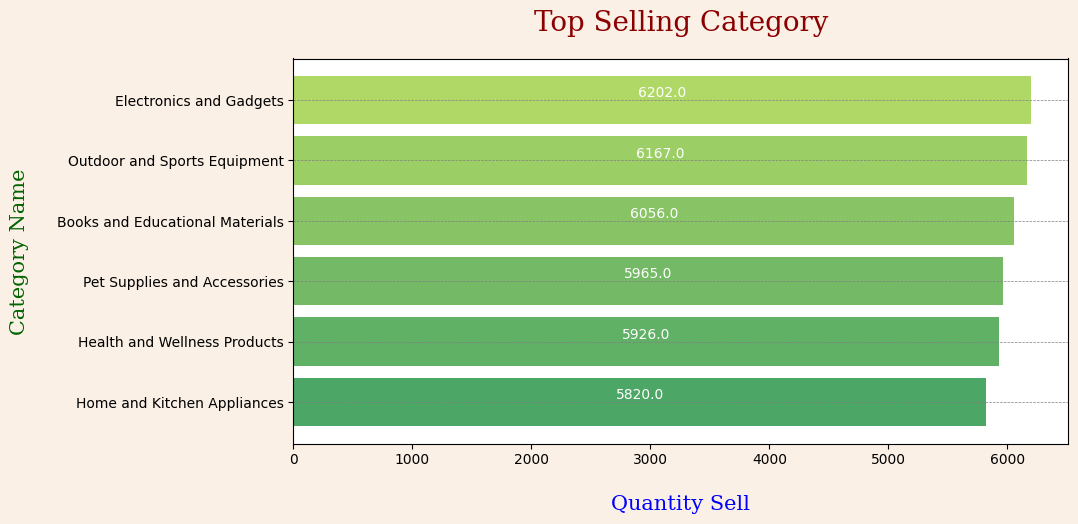

In [8]:
#Sql Query
query = '''select 
    c.Categoryname,c.CategoryID ,sum(t.Quantity) as Total_Quantity,sum(t.TotalPrice) as Total_Price
from 
    categories c
join 
    (select s.SubcatID,s.Quantity,s.TotalPrice,a.CategoryID 
        from 
            salesdata s
    join 
        subcategories a
    on 
        s.SubcatID=a.SubcatID) t
on 
    c.CategoryID=t.CategoryID
group by 
    c.CategoryID
order by 
    Total_Quantity;'''

#Execute Query
H_category = read_query(query=query)

#Assign Variable
C_name=H_category['Categoryname'].values
H_category['Total_Quantity']=H_category['Total_Quantity'].astype(float)
T_quantity=H_category['Total_Quantity'].values

#Fonts
font={'family':'serif','color':'darkred','size':20}
fontx={'family':'serif','color':'blue','size':15}
fonty={'family':'serif','color':'darkgreen','size':15}

#Cmap
cm_va=np.linspace(0.3,1,10)
cmap=plt.cm.summer(cm_va)

#Ploting Graph
plt.figure(figsize=(10,5),facecolor='linen')
#plt.plot(C_name,T_quantity,marker='o',color='darkred')
plt.barh(C_name,T_quantity,color=cmap)
plt.title('Top Selling Category', fontdict=font, pad=20)
plt.xlabel('Quantity Sell',labelpad=20,fontdict=fontx)
plt.ylabel('Category Name',labelpad=20,fontdict=fonty)

#Annotating Graph
for i in range(len(C_name)):
    plt.annotate(text=T_quantity[i],xy=(T_quantity[i]/2,i),
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 color='white')
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 5 . Which supplier has the highest total sales?

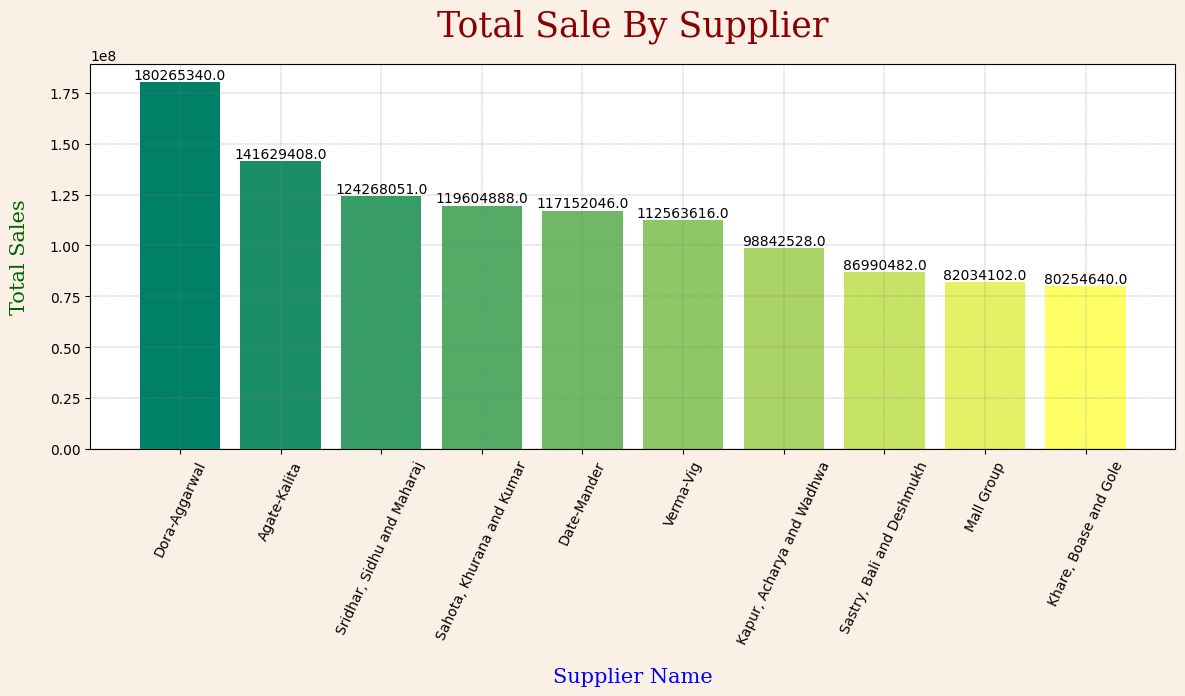

In [10]:
#SQL Query
query='''select s.SupplierID,s.SupplierName ,sum(t.TotalPrice) as Total_sales
from suppliers s
join (select c.SupplierID,s.TotalPrice
from salesdata s
join subcategories c
on s.SubcatID=c.SubcatID) t
on s.SupplierID=t.SupplierID
group by s.SupplierID 
order by Total_sales desc
limit 10;'''

#Executing Query
S_sales=read_query(query=query)

#Assign Variable
Supplier=S_sales['SupplierName'].values
Sales=S_sales['Total_sales'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Figure
plt.figure(figsize=(14,5),facecolor='linen')
plt.bar(height=Sales,x=Supplier,color=cmap)
plt.title('Total Sale By Supplier',fontdict={'family':'serif','size':25,'color':'darkred'},pad=20)
plt.xlabel('Supplier Name',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.ylabel('Total Sales',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=65)

#Annotating Graph
for i in range(len(Supplier)):
    plt.annotate(text=Sales[i],xy=(i,Sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(linestyle='--',linewidth=0.3,color='gray')
plt.show()

# 6. How many sales were made by each customer?

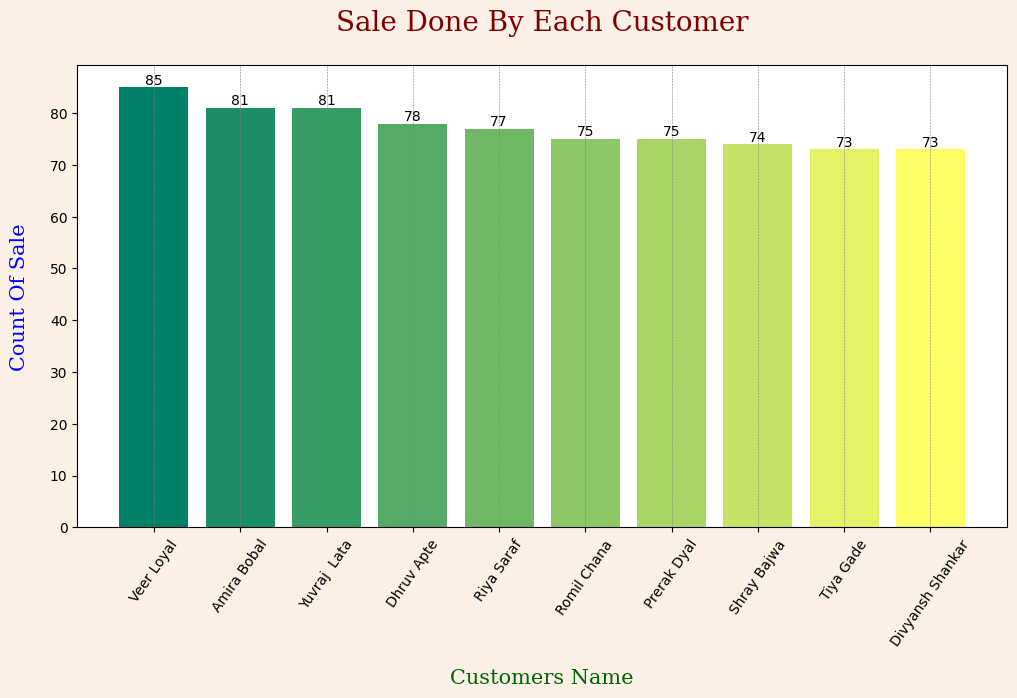

In [11]:
# SQL Query
query='''select s.CustomerID,concat(c.FirstName," ",c.LastName) as Cust_Names, count(s.CustomerID) as Cust_buy
from
	salesdata s
join
	customers c
on 
	c.CustomerID=s.CustomerID
group by
	s.CustomerID,Cust_Names
order by
	Cust_buy desc
limit 10;'''

#Execute Query
S_cust=read_query(query=query)

#Asign Variables
Cust_name=S_cust['Cust_Names'].values
Cust_buy=S_cust['Cust_buy'].values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,6),facecolor='linen')
plt.bar(height=Cust_buy,x=Cust_name,color=cmap)
plt.title('Sale Done By Each Customer',fontdict={'family':'serif','size':20,'color':'maroon'},pad=25)
plt.xlabel('Customers Name',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.ylabel('Count Of Sale',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.xticks(rotation=55)

#Annoting Graph
for i in range(len(Cust_name)):
    plt.annotate(text=Cust_buy[i],xy=(i,Cust_buy[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(axis='x',linestyle="--",linewidth=0.4,color='gray')
plt.show()

# 7. What is the total salary expenditure on employees in each department?

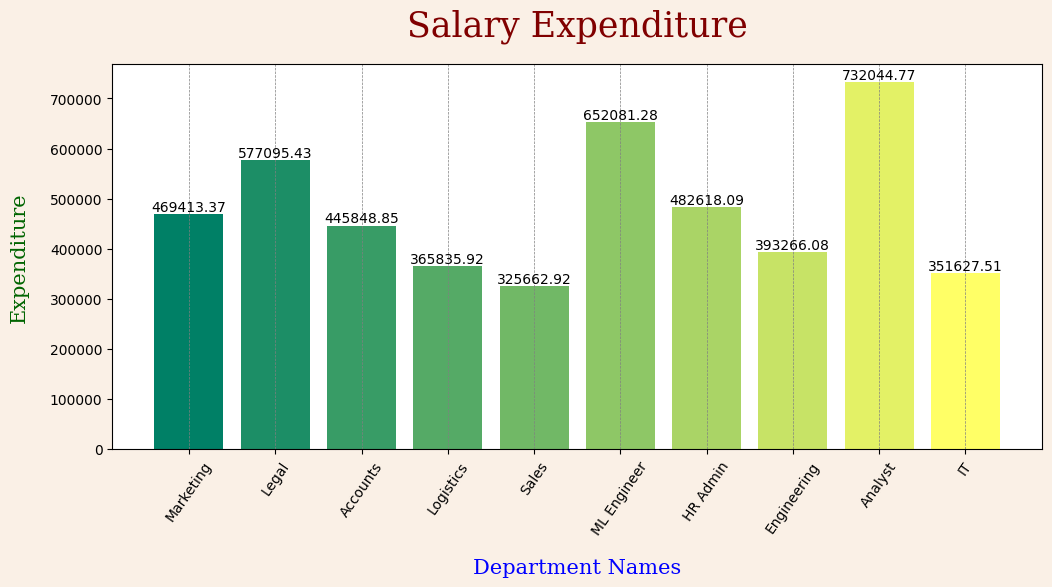

In [12]:
#SQL Query
query='''select Department,sum(Salary) as Total_Salary
from employees
group by Department;'''

#Exucting Query
D_salary=read_query(query=query)

#Assign Vairable
Department=D_salary['Department'].values
Salary=D_salary['Total_Salary'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,5),facecolor='linen')
plt.bar(height=Salary,x=Department,color=cmap)
plt.title('Salary Expenditure',fontdict={'family':'serif','color':'maroon','size':25},pad=20)
plt.xlabel('Department Names',fontdict={'family':'serif','color':'blue','size':15},labelpad=15)
plt.ylabel('Expenditure',fontdict={'family':'serif','color':'darkgreen','size':15},labelpad=15)
plt.xticks(rotation=55)

#Annotating Graph
for i in range(len(Department)):
    plt.annotate(text=Salary[i],xy=(i,Salary[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')
    

plt.grid(axis='x',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 8. Which subcategory has the highest average selling price?

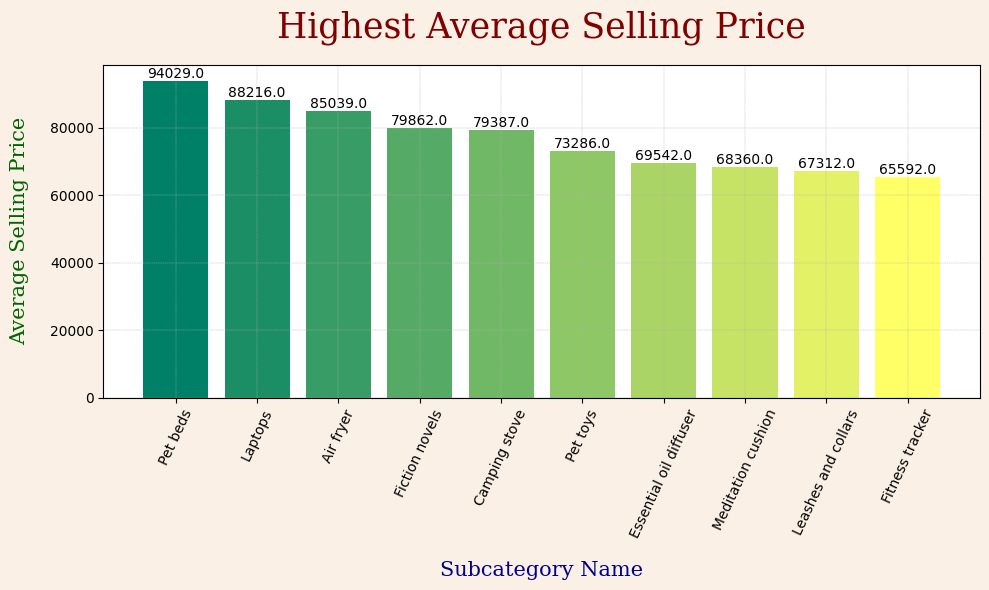

In [13]:
#SQL Query
query='''select 
	        SubcatName,avg(UnitPrice) as AvgSellingPrice
        from 
	        subcategories
        group by 
	        SubcatName
        order by
	        AvgSellingPrice desc
        limit 10;'''

#Executing Query
highest_sp=read_query(query=query)

#Assign Variable
name=highest_sp['SubcatName'].values
avgselling_price=highest_sp['AvgSellingPrice'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(10,6),facecolor='linen')
plt.bar(height=avgselling_price,x=name,color=cmap)
plt.title('Highest Average Selling Price',fontdict={'family':'serif','size':25,'color':'maroon'},pad=20)
plt.xlabel('Subcategory Name',fontdict={'family':'serif','size':15,'color':'darkblue'},labelpad=15)
plt.ylabel('Average Selling Price',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=65)
plt.tight_layout()

#Annotating Graph
for i in range(len(name)):
    plt.annotate(text=avgselling_price[i],xy=(i,avgselling_price[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(ls='--',lw=0.3)
plt.show()